In [211]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline 
import warnings                        
warnings.filterwarnings("ignore")

In [212]:
#Exploratory Data Analysis
train=pd.read_csv('F:/ict/virtual Assesment/train_ctrUa4K.csv')

In [213]:
test=pd.read_csv('F:/ict/virtual Assesment/test_lAUu6dG.csv')

In [214]:
train_original=train.copy() 
test_original=test.copy()

In [215]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [216]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [217]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [218]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [219]:
train.shape 

(614, 13)

In [220]:
test.shape

(367, 12)

In [221]:
##target variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot: >

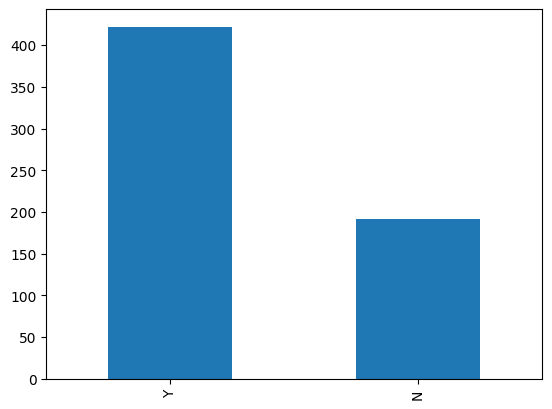

In [222]:
train['Loan_Status'].value_counts().plot.bar()

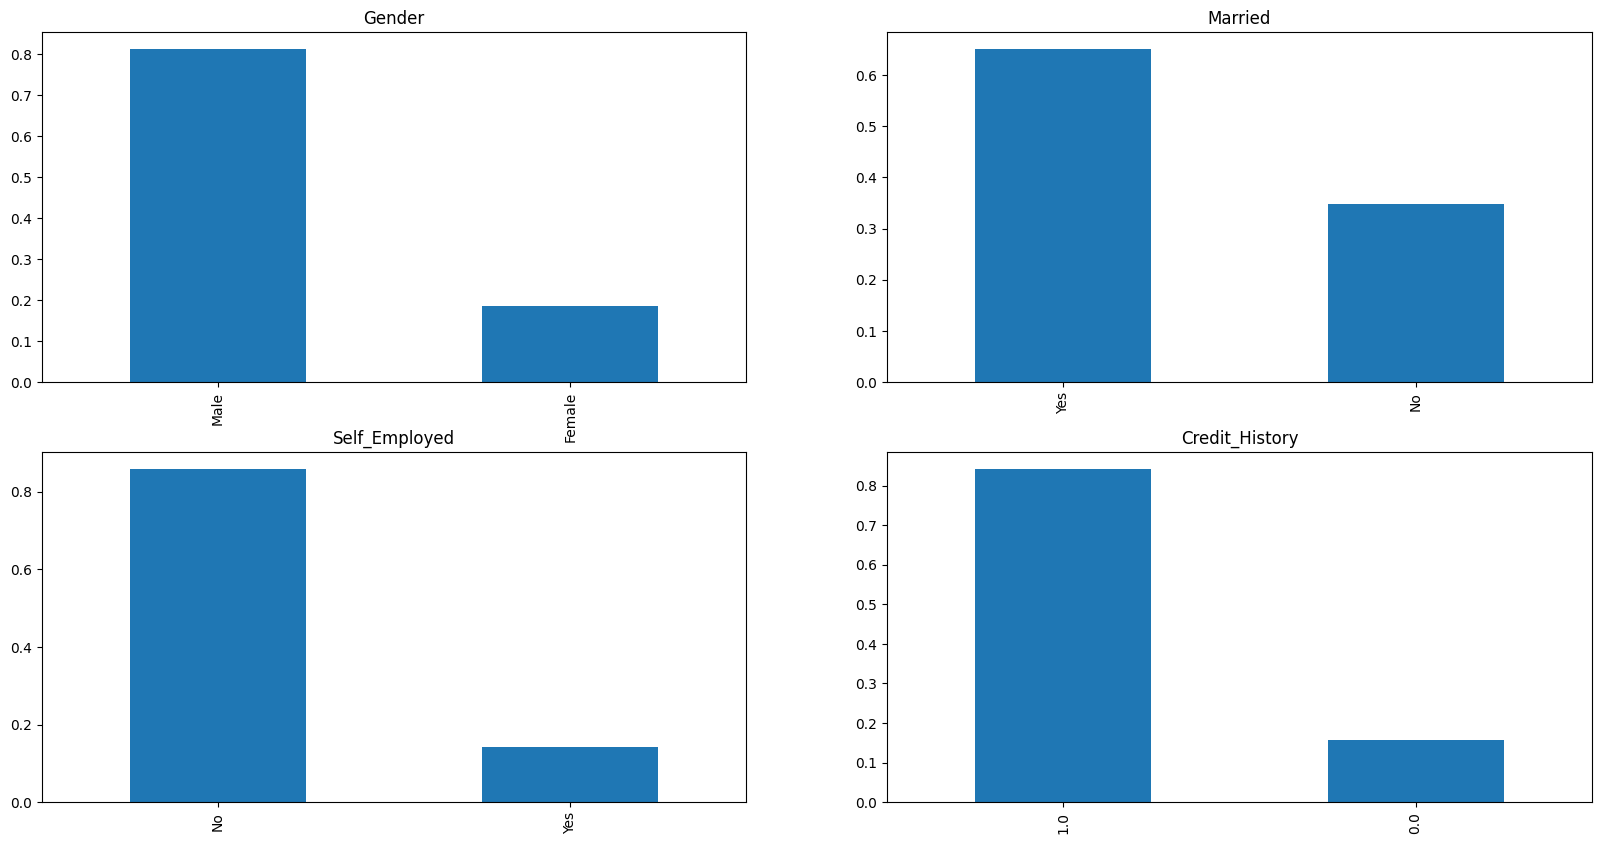

In [223]:
#Independent Variable (Categorical)
plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

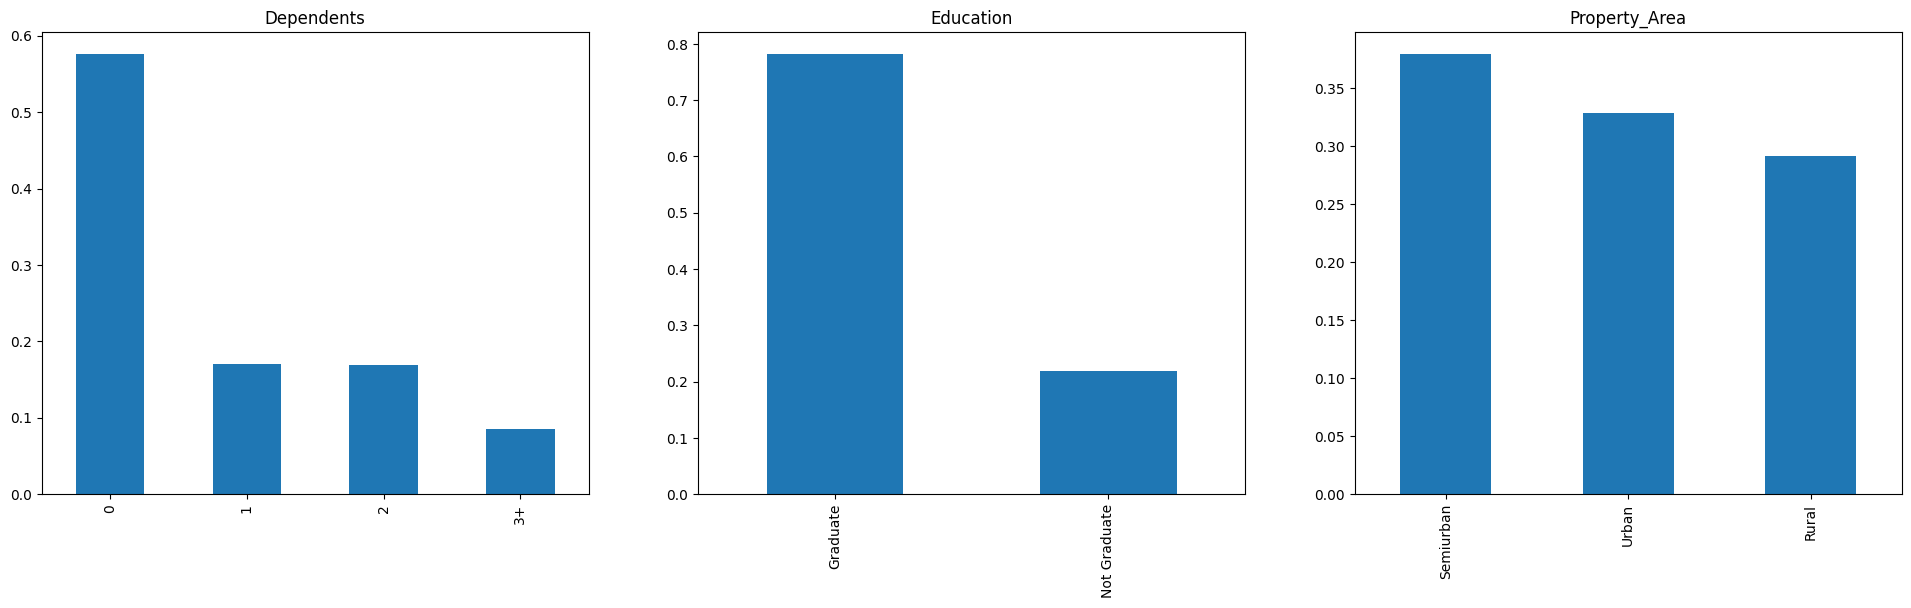

In [224]:
#Independent Variable (Ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

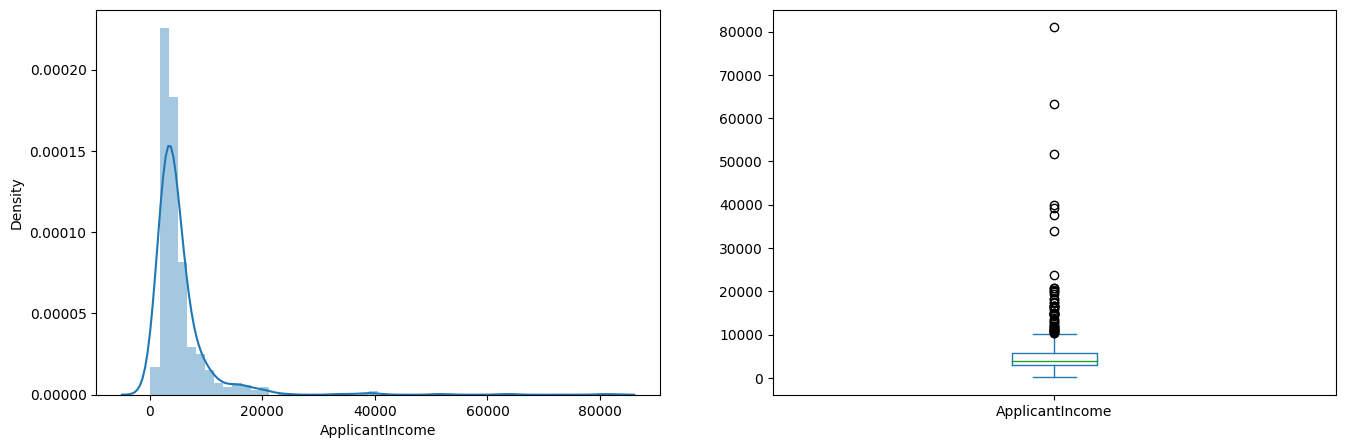

In [225]:
#Independent Variable (Numerical)
# 1 - Applicant income
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

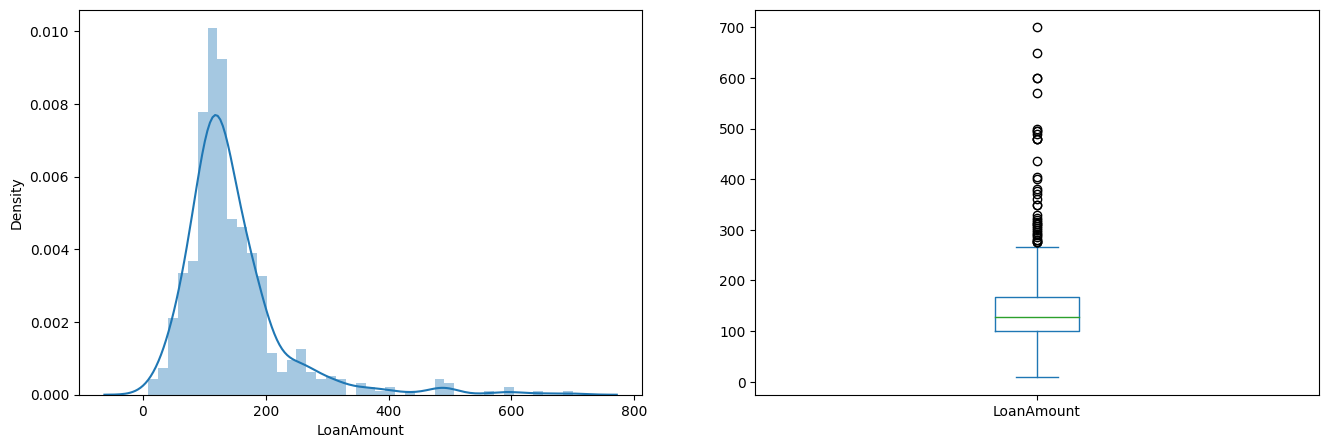

In [226]:
# 2 - Loan amount
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [227]:
corr_matrix = train.corr()

<AxesSubplot: >

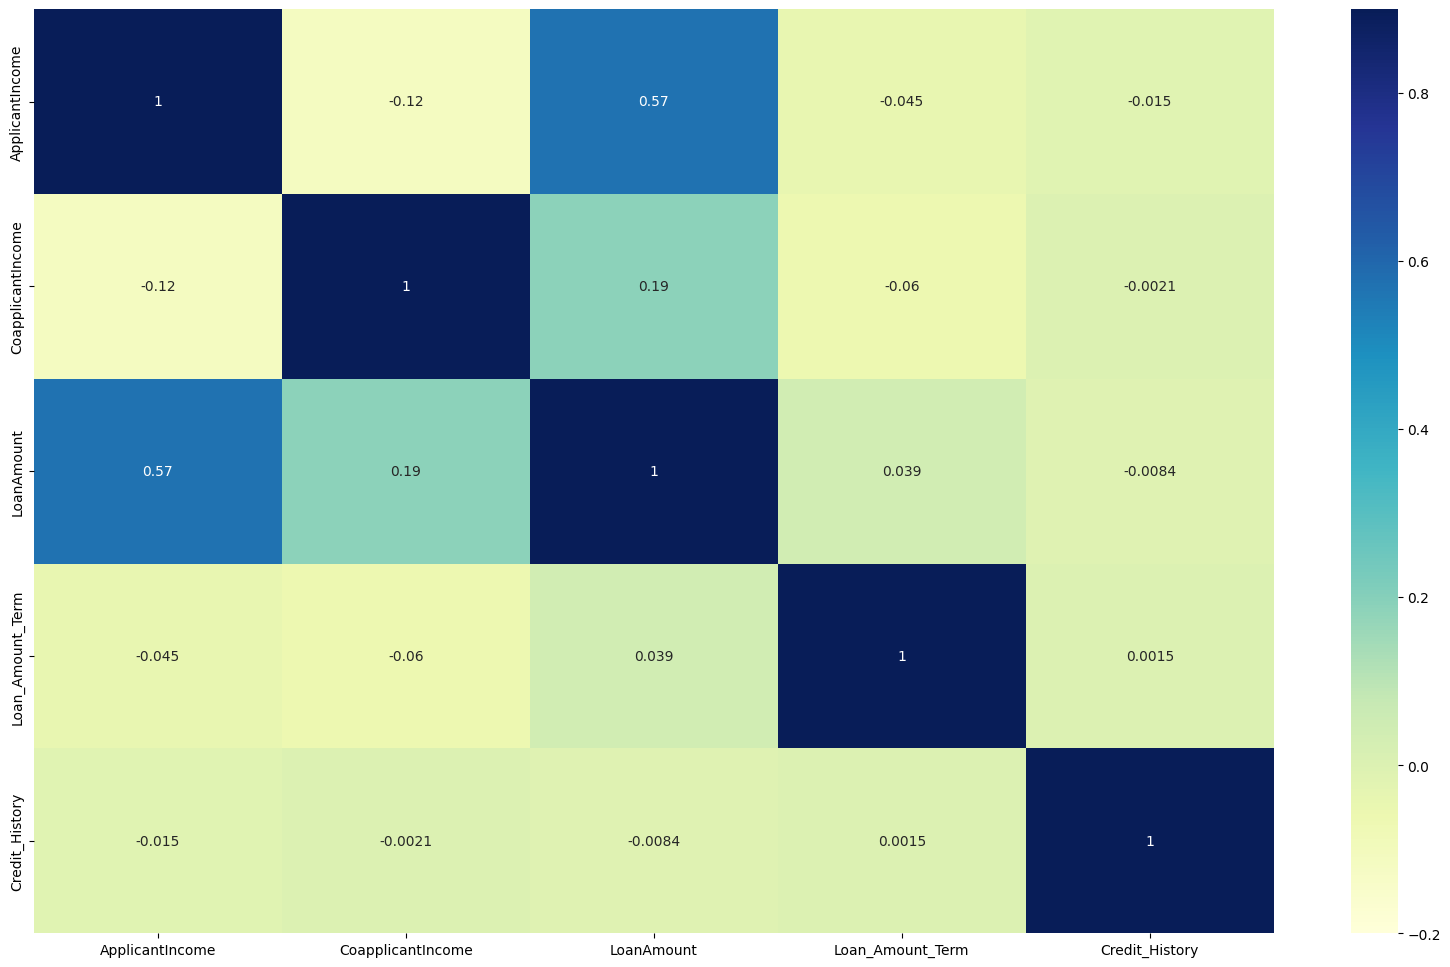

In [228]:
plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix,vmin =-0.2,vmax = 0.9,annot=True,cmap='YlGnBu')

In [229]:
#Missing Value and Outlier Treatment
#Missing Value Imputation

In [230]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [231]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [232]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [233]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [234]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [235]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Text(0.5, 1.0, 'Boxplot for LoanAmount')

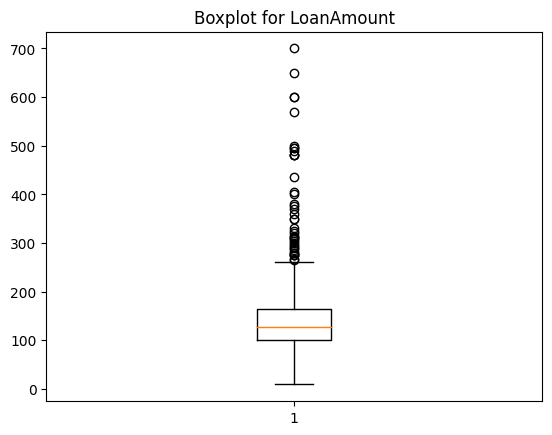

In [236]:
#Outlier Treatment
plt.boxplot(train['LoanAmount'])
plt.title('Boxplot for LoanAmount')

In [237]:
Q1=np.percentile(train['LoanAmount'],25)

In [238]:
Q2=np.percentile(train['LoanAmount'],50)

In [239]:
Q3=np.percentile(train['LoanAmount'],75)

In [240]:
IQR=Q3-Q1

In [241]:
low_limit=Q1-1.5*IQR
upr_lim=Q3+1.5*IQR

In [242]:
outlier=[]
for x in train['LoanAmount']:
    if ((x>upr_lim)or(x<low_limit)):
        outlier.append(x)

In [243]:
outlier

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [244]:
ind=train['LoanAmount']>upr_lim
train.loc[ind].index

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

In [245]:
train.drop([5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],inplace=True)

In [246]:
train.shape

(573, 13)

In [247]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [248]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [249]:
#Encoding
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [250]:
#Model Building
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.25)

In [251]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [252]:
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [253]:
pred_cv = model.predict(x_cv)

In [254]:
accuracy_score(y_cv,pred_cv)

0.7847222222222222

In [255]:
test.dtypes

ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [256]:
pred_test = model.predict(test)

In [257]:
submission=pd.read_csv('F:/ict/virtual Assesment/sample_submission_49d68Cx.csv')

In [258]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [259]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [260]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [261]:
from IPython.display import HTML
import base64 
def create_download_link( submission, title = "Download CSV file", filename = "logistic.csv"):  
    csv = submission.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)

In [262]:
#SVM
from sklearn.svm import SVC

In [263]:
svm_clf = SVC(kernel='rbf')

In [264]:
svm_model=svm_clf.fit(x_train,y_train)

In [265]:
svm_model

SVC()

In [266]:
predc_cv = svm_clf.predict(x_cv)

In [267]:
accuracy_score(y_cv,predc_cv)

0.6458333333333334

In [268]:
predc_test =svm_clf.predict(test)

In [269]:
submission1=pd.read_csv('F:/ict/virtual Assesment/sample_submission_49d68Cx.csv')

In [270]:
submission1['Loan_Status']=predc_test 
submission1['Loan_ID']=test_original['Loan_ID']

In [271]:
submission1['Loan_Status'].replace(0, 'N',inplace=True) 
submission1['Loan_Status'].replace(1, 'Y',inplace=True)

In [272]:
pd.DataFrame(submission1, columns=['Loan_ID','Loan_Status']).to_csv('SVM.csv')

In [273]:
from IPython.display import HTML
import base64 
def create_download_link( submission1, title = "Download CSV file", filename = "svm.csv"):  
    csv = submission1.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission1)

In [274]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [275]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [276]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [277]:
predct_cv = dt_clf.predict(x_cv)

In [278]:
accuracy_score(y_cv,predct_cv)

0.7222222222222222

In [279]:
predct_test = dt_clf.predict(test)

In [280]:
submission2=pd.read_csv('F:/ict/virtual Assesment/sample_submission_49d68Cx.csv')

In [281]:
submission2['Loan_Status']=predct_test 
submission2['Loan_ID']=test_original['Loan_ID']

In [282]:
submission2['Loan_Status'].replace(0, 'N',inplace=True) 
submission2['Loan_Status'].replace(1, 'Y',inplace=True)

In [283]:
pd.DataFrame(submission2, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTree.csv')

In [284]:
from IPython.display import HTML
import base64 
def create_download_link( submission2, title = "Download CSV file", filename = "DT.csv"):  
    csv = submission2.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission2)

In [285]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [286]:
rf_clf = RandomForestClassifier(random_state=42)

In [287]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [288]:
predctn_cv = rf_clf.predict(x_cv)

In [289]:
accuracy_score(y_cv,predctn_cv)

0.7777777777777778

In [290]:
predctn_test = rf_clf.predict(test)

In [291]:
submission3=pd.read_csv('F:/ict/virtual Assesment/sample_submission_49d68Cx.csv')

In [292]:
submission3['Loan_Status']=predctn_test 
submission3['Loan_ID']=test_original['Loan_ID']

In [293]:
submission3['Loan_Status'].replace(0, 'N',inplace=True) 
submission3['Loan_Status'].replace(1, 'Y',inplace=True)

In [294]:
pd.DataFrame(submission3, columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

In [295]:
from IPython.display import HTML
import base64 
def create_download_link( submission3, title = "Download CSV file", filename = "RF.csv"):  
    csv = submission3.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission3)

In [303]:
logisticM=pd.read_csv('F:/ict/virtual Assesment/logistic (1).csv')

In [304]:
logisticM['Loan_Status'].value_counts()

Y    305
N     62
Name: Loan_Status, dtype: int64

In [305]:
SVM=pd.read_csv('F:/ict/virtual Assesment/svm (2).csv')

In [306]:
SVM['Loan_Status'].value_counts()

Y    367
Name: Loan_Status, dtype: int64

In [307]:
DT=pd.read_csv('F:/ict/virtual Assesment/DT (1).csv')

In [308]:
DT['Loan_Status'].value_counts()

Y    253
N    114
Name: Loan_Status, dtype: int64

In [309]:
RF=pd.read_csv('F:/ict/virtual Assesment/RF (1).csv')

In [310]:
RF['Loan_Status'].value_counts()

Y    296
N     71
Name: Loan_Status, dtype: int64